In [1]:
include("./proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [103]:
using DataFrames
using GZip

##possible types in arff files are:
#real, numeric,
#date
#string
#nominal specifications, starting with {

function convertType(attrType)
  x = lowercase(attrType)
  res = nothing
    
  if in(x, ["real" "numeric"])
    res = "numeric"
  elseif startswith(x, "{")
    res = "nominal"
  else #date and string
    res = x
  end
  return(res)
end

function readArff(filename, gzip=false)
  f = nothing
  if gzip
    f = GZip.gzopen(filename)
  else
    f = open(filename)
  end
  lines = eachline(f)
    
  header = true
  colNames = nothing
  attrTypes = nothing
  myData = DataFrame()
  attributes = DataFrame()
  nAttr = 0
  nData = 0

  for l in lines
    if header
      mAttr = match(r"^[[:space:]]*@(?i)attribute", l)
      if mAttr == nothing
        mData = ismatch(r"^[[:space:]]*@(?i)data", l)
        if mData
          colNames = convert(Array, attributes[2,:])
          attrTypes = map(convertType, convert(Array, attributes[3,:]))
          header=false
          break
        end
      else
        nAttr += 1
        attributes[:, nAttr] = split(l)[1:3]
      end
    end
  end
  myData = readtable(f, names = vec(map(Symbol, colNames)))
  close(f)
  return(myData, attrTypes)
end

readArff (generic function with 2 methods)

In [104]:
dataset1, attributeTypes1 = readArff("Mohammad14JulyDS_1.arff")
dataset1

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
1,1,1,1,1,1,1,0,-1,1,1,1,1,1,1,0,-1,1,1,0,1,1,1,1,1,1,1,-1,-1,1,1,1
2,1,0,1,1,1,1,1,-1,1,1,1,1,1,1,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,0,-1,1
3,1,0,1,1,1,1,1,0,1,1,1,1,1,-1,1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,-1,1,1
4,1,0,-1,1,1,-1,-1,-1,1,1,1,1,1,1,0,-1,1,1,0,-1,1,-1,1,-1,-1,-1,1,1,1,1,-1
5,-1,0,-1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,1,1,-1,-1,-1
6,1,0,-1,1,1,1,1,-1,1,1,1,1,1,-1,1,-1,-1,-1,0,1,1,1,1,1,1,-1,-1,1,0,-1,1
7,1,0,1,1,1,1,1,-1,1,1,1,-1,1,-1,1,-1,1,1,0,1,1,1,1,1,1,-1,-1,1,0,1,1
8,1,0,-1,1,1,-1,-1,1,1,1,1,-1,-1,1,1,-1,1,1,0,1,1,1,1,1,-1,-1,1,1,0,1,-1
9,1,1,-1,1,1,1,0,-1,1,1,1,1,1,1,1,-1,1,1,0,1,1,1,1,1,1,-1,-1,1,0,1,1
10,1,1,1,1,1,-1,-1,-1,1,1,1,1,1,1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,1,1,-1,-1,-1


In [149]:
function swapcols(X, i, j)
     for k = 1:size(X,1)
           X[k,i],X[k,j] = X[k,j],X[k,i]
     end
     return X
end

dataset2, attributeTypes2 = readArff("Mohammad14JulyDS_2.arff");

dataset2 = swapcols(dataset2, 8, 14)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,URL_of_Anchor,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,SSLfinal_State,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNS,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
1,-1,0,-1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,1,1,-1,-1,-1
2,1,0,-1,1,1,-1,-1,1,1,1,1,-1,-1,1,1,-1,1,1,0,1,1,1,1,1,-1,-1,1,1,0,1,-1
3,1,1,1,1,1,-1,-1,1,1,1,1,1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,1,1,-1,-1,-1
4,1,1,-1,1,1,-1,0,1,1,1,1,-1,1,-1,0,1,1,1,0,1,1,1,1,-1,-1,1,1,1,-1,1,-1
5,1,1,1,1,1,-1,0,1,1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,-1,-1,-1
6,1,1,1,1,1,-1,0,1,1,1,1,1,-1,-1,0,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1
7,1,0,-1,1,1,-1,0,1,1,1,1,1,-1,1,1,-1,-1,-1,0,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1
8,1,0,1,1,1,-1,-1,1,1,1,1,-1,-1,1,1,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1,-1
9,1,1,1,1,1,-1,-1,1,1,1,1,-1,1,-1,0,-1,1,1,0,1,1,1,1,-1,-1,1,1,-1,-1,1,-1
10,1,1,1,1,1,-1,-1,1,1,1,1,1,1,1,0,-1,1,1,0,1,1,1,1,-1,-1,-1,1,-1,-1,1,-1


In [150]:
dataset = vcat(dataset1, dataset2);

In [151]:
dataset = dataset[shuffle(1:end),:]

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,DNS
1,1,-1,1,1,1,1,0,-1,-1,1,1,-1,-1,-1,1,-1,1,1,0,1,1,1,1,-1,-1,-1,1,1,-1,1,-1,NA
2,1,1,1,1,1,1,0,1,1,1,1,1,1,-1,-1,1,1,1,0,1,1,1,1,-1,-1,-1,1,1,0,1,-1,NA
3,1,-1,1,-1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,1,0,1,1,1,1,1,NA,1,1,1,0,1,1,-1
4,-1,-1,-1,1,-1,1,1,1,1,1,1,-1,1,1,0,-1,1,-1,1,1,1,1,1,1,NA,1,1,1,0,1,1,1
5,1,1,1,1,1,1,1,1,1,-1,-1,1,0,1,1,1,-1,1,0,1,1,-1,1,1,1,1,1,1,0,-1,1,NA
6,1,-1,1,1,-1,1,0,1,1,1,1,1,1,1,0,-1,1,1,0,1,1,1,1,1,NA,1,1,1,0,1,1,1
7,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,1,1,0,1,1,-1,1,1,NA,-1,-1,1,1,1,-1,1
8,1,-1,1,1,1,-1,0,-1,1,1,1,1,1,-1,1,-1,1,1,0,1,1,1,1,-1,NA,-1,-1,1,1,1,-1,1
9,1,1,1,1,1,-1,0,0,1,1,1,1,1,-1,-1,1,1,1,0,1,1,1,1,1,NA,-1,-1,1,0,1,-1,-1
10,1,-1,1,1,1,1,0,-1,-1,1,1,1,0,-1,1,-1,1,1,0,1,1,1,1,1,1,-1,1,-1,1,1,-1,NA


In [152]:
y = convert(Array, dataset[:Result]);


X = delete!(dataset, :Result)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,DNS
1,1,-1,1,1,1,1,0,-1,-1,1,1,-1,-1,-1,1,-1,1,1,0,1,1,1,1,-1,-1,-1,1,1,-1,1,NA
2,1,1,1,1,1,1,0,1,1,1,1,1,1,-1,-1,1,1,1,0,1,1,1,1,-1,-1,-1,1,1,0,1,NA
3,1,-1,1,-1,1,1,1,1,1,1,1,1,1,1,-1,-1,1,1,0,1,1,1,1,1,NA,1,1,1,0,1,-1
4,-1,-1,-1,1,-1,1,1,1,1,1,1,-1,1,1,0,-1,1,-1,1,1,1,1,1,1,NA,1,1,1,0,1,1
5,1,1,1,1,1,1,1,1,1,-1,-1,1,0,1,1,1,-1,1,0,1,1,-1,1,1,1,1,1,1,0,-1,NA
6,1,-1,1,1,-1,1,0,1,1,1,1,1,1,1,0,-1,1,1,0,1,1,1,1,1,NA,1,1,1,0,1,1
7,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,1,1,0,1,1,-1,1,1,NA,-1,-1,1,1,1,1
8,1,-1,1,1,1,-1,0,-1,1,1,1,1,1,-1,1,-1,1,1,0,1,1,1,1,-1,NA,-1,-1,1,1,1,1
9,1,1,1,1,1,-1,0,0,1,1,1,1,1,-1,-1,1,1,1,0,1,1,1,1,1,NA,-1,-1,1,0,1,-1
10,1,-1,1,1,1,1,0,-1,-1,1,1,1,0,-1,1,-1,1,1,0,1,1,1,1,1,1,-1,1,-1,1,1,NA


In [153]:
colnumbers = [x for x in 1:31]
cnt = zeros(3)
for i in colnumbers
     cnt = zeros(3)
     for entry in X[i]
         if !isna.(entry)
             cnt[entry+2] += 1
         end
     end
     X[isna.(X[i]), i] = findmax(cnt)[2]-2
    
end
X = Array(X)

5124×31 Array{Int64,2}:
  1  -1   1   1   1   1   0  -1  -1  …   1  -1  -1  -1   1   1  -1   1   1
  1   1   1   1   1   1   0   1   1      1  -1  -1  -1   1   1   0   1   1
  1  -1   1  -1   1   1   1   1   1      1   1   1   1   1   1   0   1  -1
 -1  -1  -1   1  -1   1   1   1   1      1   1   1   1   1   1   0   1   1
  1   1   1   1   1   1   1   1   1      1   1   1   1   1   1   0  -1   1
  1  -1   1   1  -1   1   0   1   1  …   1   1   1   1   1   1   0   1   1
  1  -1   1   1   1  -1  -1  -1  -1      1   1   1  -1  -1   1   1   1   1
  1  -1   1   1   1  -1   0  -1   1      1  -1   1  -1  -1   1   1   1   1
  1   1   1   1   1  -1   0   0   1      1   1   1  -1  -1   1   0   1  -1
  1  -1   1   1   1   1   0  -1  -1      1   1   1  -1   1  -1   1   1   1
  1  -1   1   1   1   1   1   1   1  …   1   1   1   0   1   1   0   1   1
  1   1   1   1   1  -1   1  -1  -1      1  -1   1  -1  -1   1   1   1   1
  1   1   1   1   1   1  -1   1   1     -1  -1  -1  -1   1  -1  -1   1   1
 

In [154]:
Xtrain = X[1:4000,:]
Xtest = X[4001:end,:]
ytrain = y[1:4000]
ytest = y[4001:end];

In [155]:
using ScikitLearn: fit!, predict

In [156]:
Pkg.add("DecisionTree")

using ScikitLearn
using PyCall
using PyPlot
using ScikitLearn.CrossValidation: train_test_split
using DecisionTree

#using ScikitLearn.Models: DecisionTreeClassifier, RandomForestClassifier, AdaBoostStumpClassifier
@pyimport matplotlib.colors as mplc
@sk_import preprocessing: StandardScaler
@sk_import neighbors: KNeighborsClassifier
@sk_import svm: SVC
@sk_import naive_bayes: GaussianNB
@sk_import discriminant_analysis: (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)
using ScikitLearn.Utils: meshgrid

INFO: Package DecisionTree is already installed
INFO: METADATA is out-of-date — you may not have the latest version of DecisionTree
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [157]:
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model.logistic.LogisticRegression'>

In [158]:
using ScikitLearn.GridSearch: GridSearchCV
gridsearch = GridSearchCV(LogisticRegression(penalty = "l1"), Dict(:C => 0.1:0.1:2.0))
fit!(gridsearch, Xtest, ytest)
println("Best parameters: $(gridsearch.best_params_)")

Best parameters: Dict{Symbol,Any}(Pair{Symbol,Any}(:C, 1.0))


In [159]:
using ScikitLearn.GridSearch: GridSearchCV
gridsearch = GridSearchCV(LogisticRegression(penalty = "l2"), Dict(:C => 0.1:0.1:2.0))
fit!(gridsearch, Xtest, ytest)
println("Best parameters: $(gridsearch.best_params_)")

Best parameters: Dict{Symbol,Any}(Pair{Symbol,Any}(:C, 1.1))


In [160]:
log = LogisticRegression(C = 0.5, penalty = "l1", fit_intercept=true, max_iter = 100)
fit!(log, Xtrain, ytrain)
#model0 = fit(model, X, y)
ylog = predict(log,Xtest) #the output vector of predictions
accuracy = count(ylog .== ytest)/length(ytest)
#accuracy = sum(predict(log, Xtest) .== ytest) / length(ytest)
#println("accuracy: $accuracy")

0.9288256227758007

In [161]:
false_neg = 0 
false_pos = 0 
sum = 0 
for i=1:length(ylog)
    if ytest[i] != ylog[i]
        sum+=1
        if (ytest[i] == 1 && ylog[i] == -1)
            false_neg += 1
        else
            false_pos += 1
        end
    end
end
println(false_neg/length(ylog))
println(false_pos/length(ylog))

0.023131672597864767
0.04804270462633452


In [162]:
log2 = LogisticRegression(C = 0.1, penalty = "l2", fit_intercept=true)
fit!(log2, Xtrain, ytrain)
#model0 = fit(model, X, y)
ylog2 = predict(log2,Xtest) #the output vector of predictions
accuracy = count(ylog .== ytest)/length(ytest)
#accuracy = sum(predict(log, Xtest) .== ytest) / length(ytest)
#println("accuracy: $accuracy")


0.9288256227758007

In [163]:
log

PyObject LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
false_neg = 0 
false_pos = 0 
for i=1:length(ylog2)
    if ytest[i] != ylog2[i]
        sum+=1
        if (ytest[i] == 1 && ylog2[i] == -1)
            false_neg += 1
        else
            false_pos += 1
        end
    end
end
println(false_neg/length(ylog))
println(false_pos/length(ylog))

0.021352313167259787
0.04804270462633452


In [121]:
#the probabilities of either -1 (first column) or 1 (second column)
p = predict_proba(log, Xtest)

1124×2 Array{Float64,2}:
 0.999882    0.00011765 
 0.0840002   0.916      
 0.987093    0.0129068  
 0.0837364   0.916264   
 0.964591    0.0354094  
 0.999599    0.000400872
 0.759044    0.240956   
 0.999581    0.000419481
 0.99484     0.00516012 
 0.0151919   0.984808   
 0.0389244   0.961076   
 0.982016    0.0179842  
 0.243416    0.756584   
 ⋮                      
 0.990825    0.0091746  
 0.152096    0.847904   
 0.902249    0.0977508  
 0.892436    0.107564   
 0.0807093   0.919291   
 0.0186492   0.981351   
 0.0557226   0.944277   
 0.00947892  0.990521   
 0.999332    0.000668146
 0.999141    0.000858521
 0.019575    0.980425   
 0.268124    0.731876   

In [122]:
using ScikitLearn.CrossValidation: cross_val_score

@time cv1 = cross_val_score(LogisticRegression(C=0.5, penalty = "l1"), X, y; cv = 10)

  0.850798 seconds (5.14 k allocations: 19.383 MiB, 4.43% gc time)


10-element Array{Float64,1}:
 0.937622
 0.937622
 0.931774
 0.94152 
 0.933723
 0.945419
 0.945313
 0.933594
 0.90998 
 0.908023

In [123]:
using StatsBase, StatsFuns, StreamStats
summarystats(cv1)

Summary Stats:
Mean:           0.932459
Minimum:        0.908023
1st Quartile:   0.932229
Median:         0.935673
3rd Quartile:   0.940546
Maximum:        0.945419


In [124]:
@time cv2 = cross_val_score(LogisticRegression(C=0.1, penalty = "l2"), X, y; cv=10)

  0.500154 seconds (4.93 k allocations: 19.380 MiB, 36.38% gc time)


10-element Array{Float64,1}:
 0.935673
 0.94152 
 0.927875
 0.937622
 0.927875
 0.94347 
 0.947266
 0.935547
 0.915851
 0.911937

In [125]:
summarystats(cv2)

Summary Stats:
Mean:           0.932464
Minimum:        0.911937
1st Quartile:   0.927875
Median:         0.935610
3rd Quartile:   0.940546
Maximum:        0.947266


# proximal gradient method 

In [126]:
using LowRankModels

In [127]:
import LowRankModels: evaluate, grad
evaluate(loss::Loss, X::Array{Float64,2}, w, y) = evaluate(loss, X*w, y)
grad(loss::Loss, X::Array{Float64,2}, w, y) = X'*grad(loss, X*w, y)

grad (generic function with 20 methods)

In [128]:
# proximal gradient method
function proxgrad(loss::Loss, reg::Regularizer, X, y;
                  maxiters::Int = 10, stepsize::Number = 1., 
                  ch::ConvergenceHistory = ConvergenceHistory("proxgrad"))
    w = zeros(size(X,2))
    for t=1:maxiters
        t0 = time()
        # gradient step
        g = grad(loss, X, w, y)
        w = w - stepsize*g
        # prox step
        w = prox(reg, w, stepsize)
        # record objective value
        update_ch!(ch, time() - t0, obj = evaluate(loss, X, w, y) + evaluate(reg, w))
    end
    return w
end

proxgrad (generic function with 2 methods)

In [129]:
reg = OneReg()
loss = LogisticLoss()

LowRankModels.LogisticLoss(1.0, LowRankModels.BoolDomain())

In [130]:
y_i = convert(Array{Bool}, ytrain .== 1);

In [131]:
X_i = convert(Array{Float64,2},Xtrain);

In [132]:
step = 1/norm(Xtrain)^2

1.9073543418828574e-5

In [133]:
using Plots

ch = ConvergenceHistory("OneReg")
w = proxgrad(loss, reg, X_i, y_i; 
             stepsize=step, maxiters=1000,
             ch = ch)

Plots.plot(ch.objective)
println(w)
println(maximum(abs.(w)))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] max(::Array{Float64,1}, ::Int64) at ./deprecated.jl:57
 [3] #proxgrad#42(::Int64, ::Float64, ::LowRankModels.ConvergenceHistory, ::Function, ::LowRankModels.LogisticLoss, ::LowRankModels.OneReg, ::Array{Float64,2}, ::Array{Bool,1}) at ./In[128]:12
 [4] (::#kw##proxgrad)(::Array{Any,1}, ::#proxgrad, ::LowRankModels.LogisticLoss, ::LowRankModels.OneReg, ::Array{Float64,2}, ::Array{Bool,1}) at ./<missing>:0
 [5] include_string(::String, ::String) at ./loading.jl:515
 [6] include_string(::Module, ::String, ::String) at /Users/Joshua/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/Joshua/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /Users/Joshua/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[133], in expression starting on line 4
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.

[-0.062475, 0.0578973, 0.00511565, -0.600075, -0.206478, 0.985686, 0.676693, 1.64828, -0.15709, 0.116157, -0.155472, -0.0260746, -0.279775, 1.34991, 0.200822, -0.0423966, 0.145395, -0.202953, -0.380229, -0.447566, -0.51031, 0.149167, -0.1056, 0.327085, -0.0283642, 0.460115, 0.268683, -0.216559, -0.274865, 0.0398951, 0.179162]
1.64828260844583



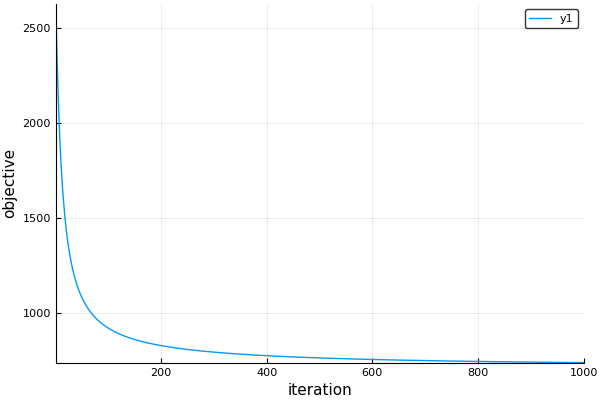

In [134]:
Plots.plot(ch.objective)
xlabel!("iteration")
ylabel!("objective")

In [135]:
y_i2 = Xtest*w

ynew = []
for i in y_i2
    if i > 0
        append!(ynew,1)
    else
        append!(ynew,-1)
    end
end

sum = 0 
for i=1:length(ynew)
    if ynew[i] == ytest[i]
        sum+=1
    end
end
println(sum/length(ynew))

0.9190391459074733


In [136]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree (Julia)",
         "Random Forest (Julia)", "AdaBoost (Julia)", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=5, C=4),
    DecisionTreeClassifier(pruning_purity_threshold=0.8),
    RandomForestClassifier(ntrees=30),
    # Note: scikit-learn's adaboostclassifier is better than DecisionTree.jl in this instance
    # because it's not restricted to stumps, and the data isn't axis-aligned
    AdaBoostStumpClassifier(niterations=30),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(), 
];

In [137]:
cvt = cross_val_score(DecisionTreeClassifier(pruning_purity_threshold=0.8), X, y; cv=10)

10-element Array{Float64,1}:
 0.97076 
 0.966862
 0.974659
 0.94347 
 0.968811
 0.961014
 0.966797
 0.949219
 0.956947
 0.964775

In [138]:
summarystats(cvt)

Summary Stats:
Mean:           0.962331
Minimum:        0.943470
1st Quartile:   0.957964
Median:         0.965786
3rd Quartile:   0.968324
Maximum:        0.974659


In [139]:
cvt = cross_val_score(RandomForestClassifier(ntrees=30),X,y; cv = 10)

10-element Array{Float64,1}:
 0.97271 
 0.974659
 0.978558
 0.955166
 0.966862
 0.968811
 0.962891
 0.966797
 0.966732
 0.966732

In [140]:
summarystats(cvt)

Summary Stats:
Mean:           0.967992
Minimum:        0.955166
1st Quartile:   0.966732
Median:         0.966829
3rd Quartile:   0.971735
Maximum:        0.978558


In [141]:
for (name, clf) in zip(names, classifiers)
    fit!(clf, Xtrain, ytrain)
    scor = score(clf, Xtest, ytest)
    println(scor)
end

0.9457295373665481
0.9190391459074733
0.8416370106761566
0.9501779359430605
0.9590747330960854
0.895017793594306
0.8959074733096085
0.9172597864768683
0.905693950177936


In [142]:
model = build_tree(ytrain, Xtrain)

Decision Tree
Leaves: 244
Depth:  24

In [143]:
model = prune_tree(model, 0.8)

Decision Tree
Leaves: 201
Depth:  19

In [144]:
print_tree(model,5)

Feature 8, Threshold 1
L-> Feature 14, Threshold 1
    L-> Feature 6, Threshold 1
        L-> -1 : 1007/1007
        R-> Feature 8, Threshold 0
            L-> Feature 17, Threshold 1
                L-> 
                R-> -1 : 456/457
            R-> Feature 2, Threshold 0
                L-> -1 : 7/8
                R-> 1 : 1/1
    R-> Feature 6, Threshold 1
        L-> -1 : 93/93
        R-> Feature 24, Threshold 1
            L-> -1 : 15/15
            R-> Feature 2, Threshold 0
                L-> 
                R-> 
R-> Feature 14, Threshold 0
    L-> Feature 7, Threshold 0
        L-> Feature 26, Threshold 1
            L-> -1 : 130/131
            R-> Feature 15, Threshold 1
                L-> 
                R-> -1 : 25/25
        R-> Feature 6, Threshold 1
            L-> Feature 13, Threshold 0
                L-> 
                R-> 
            R-> Feature 26, Threshold 0
                L-> 
                R-> 
    R-> Feature 6, Threshold 1
        L-> Feature 7,

In [145]:
ytree = apply_tree(model, Xtest); #apply model to test data

In [146]:
false_pos = 0
false_neg = 0 
sum = 0 
for i=1:length(ytree)
    if ytest[i] != ytree[i]
        sum+=1
        if (ytest[i] == 1 && ytree[i] == -1)
            false_neg += 1
        else
            false_pos += 1
        end
    end
end
println("false positive: ", false_pos/length(ytree))
println("false negative: ",false_neg/length(ytree))
println("total error ", sum/length(ytree))

false positive: 0.02224199288256228
false negative: 0.027580071174377226
total error 0.0498220640569395


In [147]:
accuracy = nfoldCV_forest(ytrain, Xtrain, 2, 100,3,0.5)


Fold 1

2×2 Array{Int64,2}:
 695   23
  35  580


Classes:  [-1, 1]
Matrix:   
Accuracy: 0.9564891222805701
Kappa:    0.9123328616266623


2×2 Array{Int64,2}:
 699   45
  32  557


Fold 2
Classes:  [-1, 1]
Matrix:   
Accuracy: 0.9422355588897224
Kappa:    0.8831562974203339


2×2 Array{Int64,2}:
 730   43
  26  534


Fold 3
Classes:  [-1, 1]
Matrix:   
Accuracy: 0.9482370592648162
Kappa:    0.8942040371252649

Mean Accuracy: 0.948987246811703


3-element Array{Float64,1}:
 0.956489
 0.942236
 0.948237

In [90]:
rf = build_forest(ytrain, Xtrain, 2, 100, 0.5, 50)

Ensemble of Decision Trees
Trees:      100
Avg Leaves: 135.23
Avg Depth:  15.53

In [91]:
yforest = apply_forest(rf, Xtest);

In [92]:
false_pos = 0
false_neg = 0 
sum = 0 
for i=1:length(yforest)
    if ytest[i] != yforest[i]
        sum+=1
        if (ytest[i] == 1 && yforest[i] == -1)
            false_neg += 1
        else
            false_pos += 1
        end
    end
end
println("false positive: ", false_pos/length(yforest))
println("false negative: ",false_neg/length(yforest))
println("total error ", sum/length(yforest))

false positive: 0.028469750889679714
false negative: 0.026690391459074734
total error 0.05516014234875445
